# Mini Project 3

### Task 3 - Supervised machine learning: classification
Made by Peter

In [91]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# for numeric calculations
import numpy as np

import seaborn as sns

# graphviz
import graphviz

In [92]:
df = pd.read_csv('../data/Emp-Attrition-Initial-Clean.csv')

### Visualizing if there is any obvious feature correlations with attrition using a correlation matrix

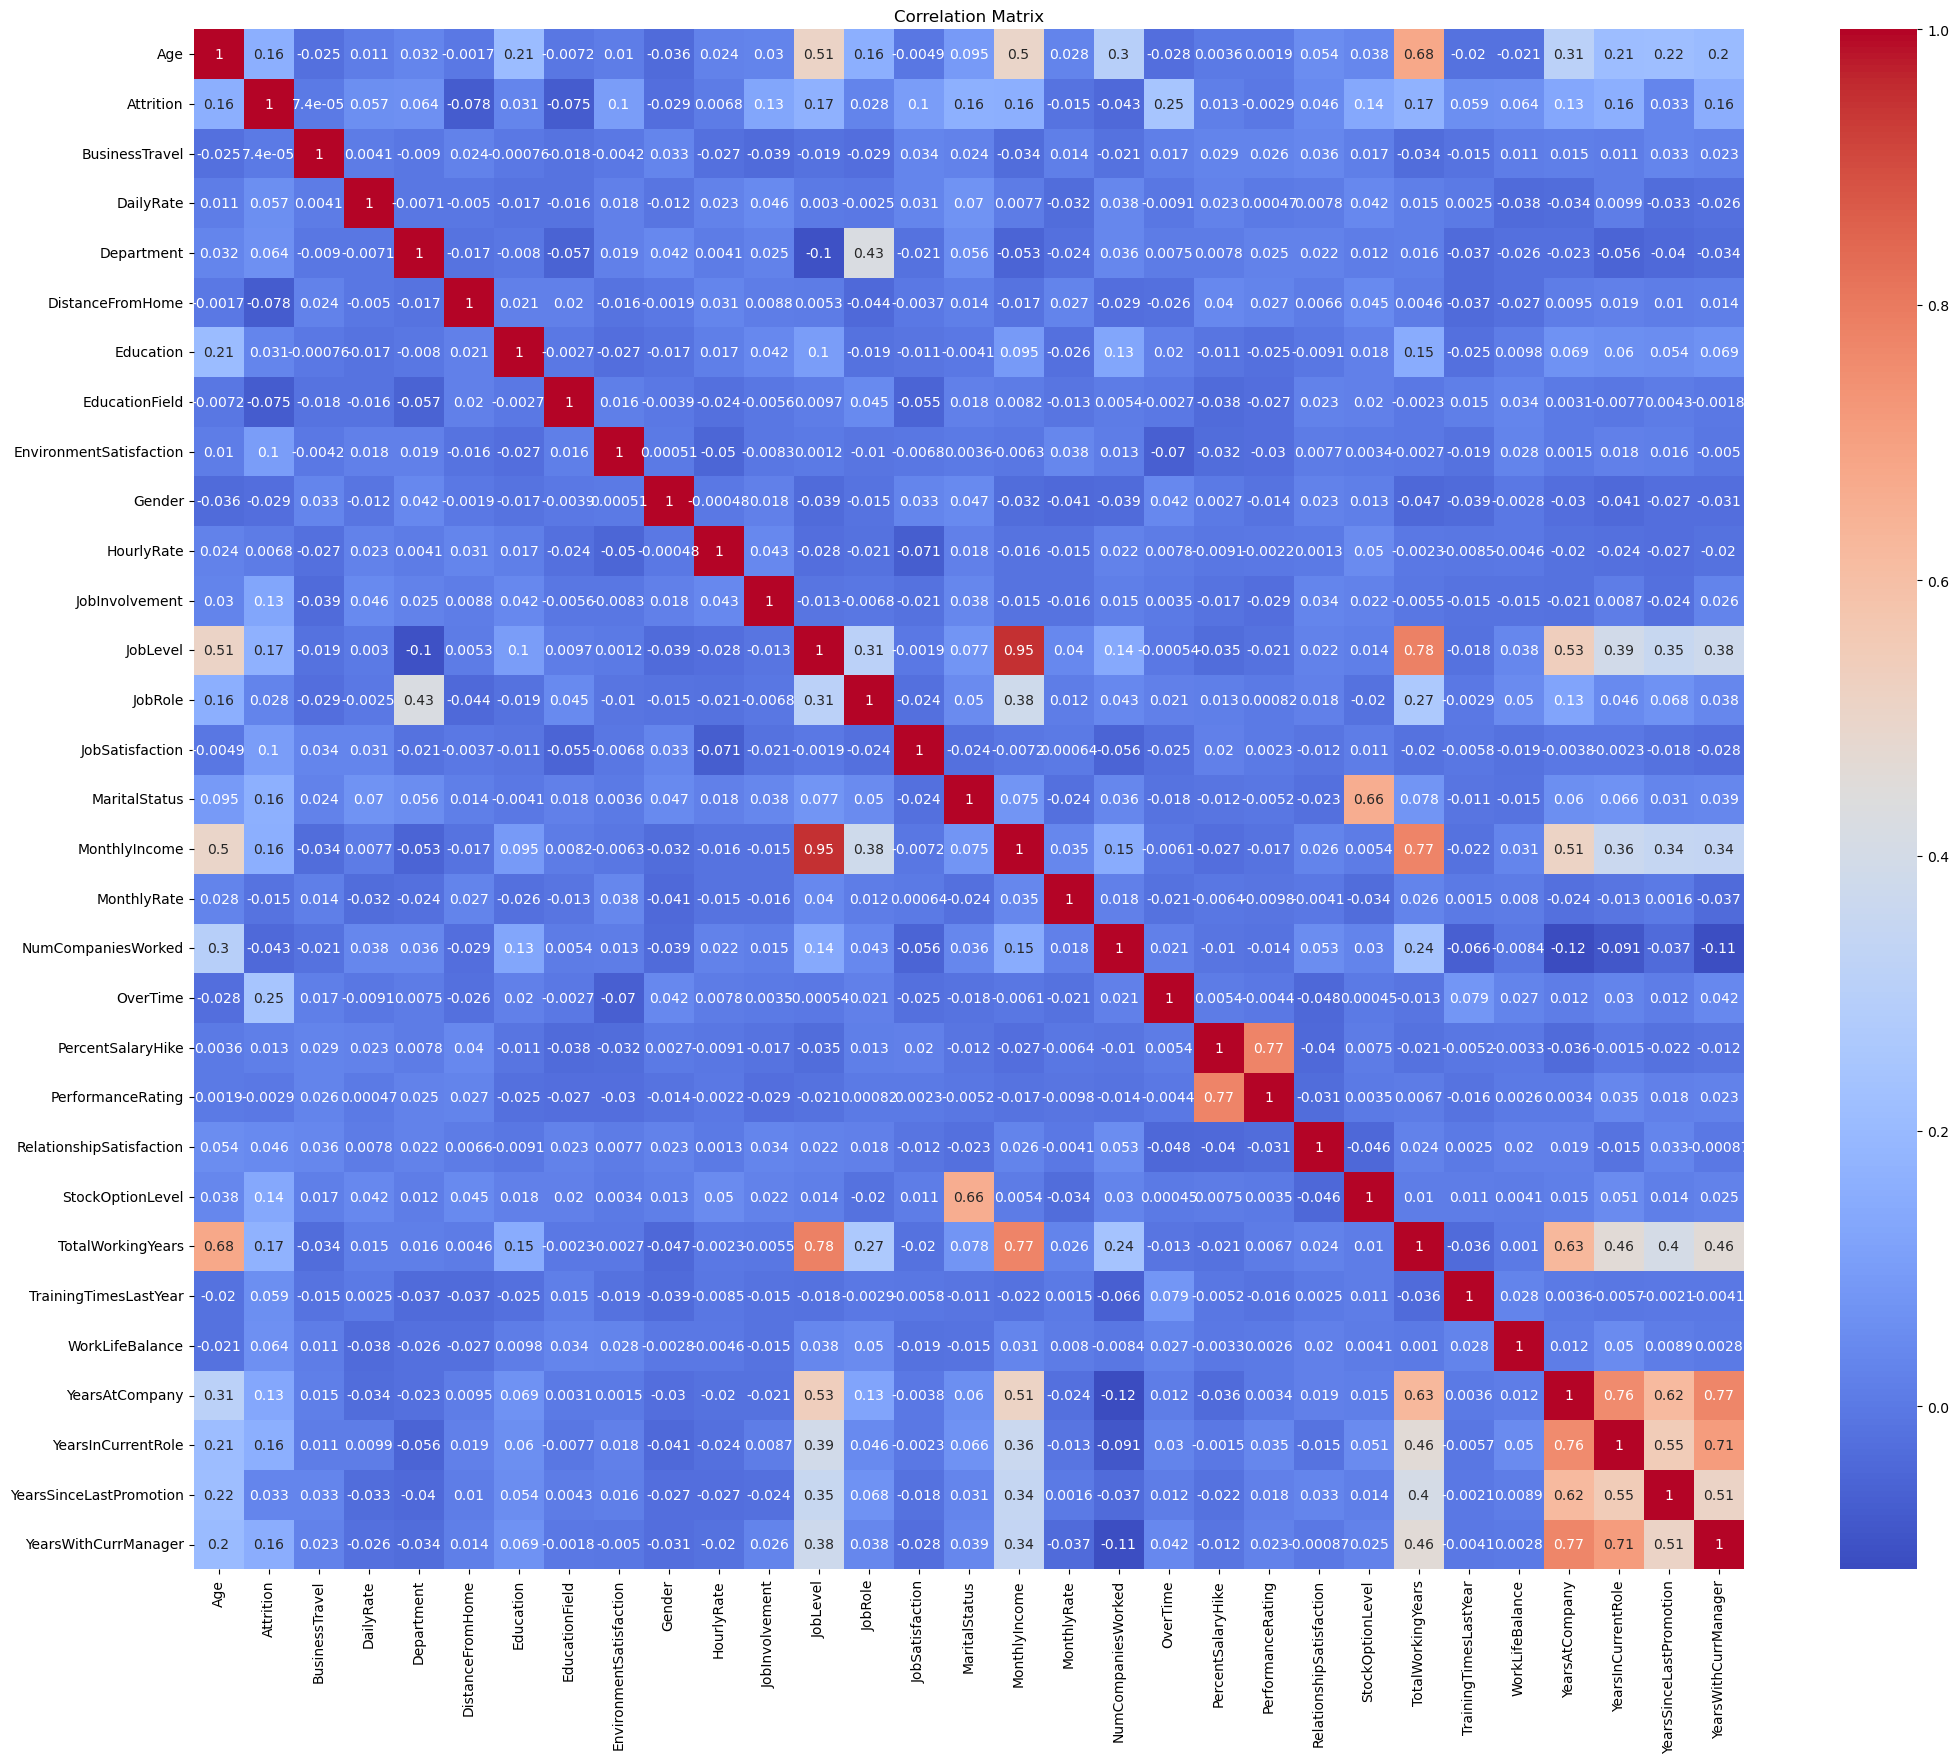

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
YearsSinceLastPromotion     0.033019
Education                   0.031373
JobRole                     0.027930
PercentSalaryHike           0.013478
HourlyRate                  0.006846
BusinessTravel              0.000074
PerformanceRating          -0.002889
MonthlyRate                -0.015170
G

In [93]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation of features with Attrition
print(corr['Attrition'].sort_values(ascending=False))

- No obvious correlation with attrition. 

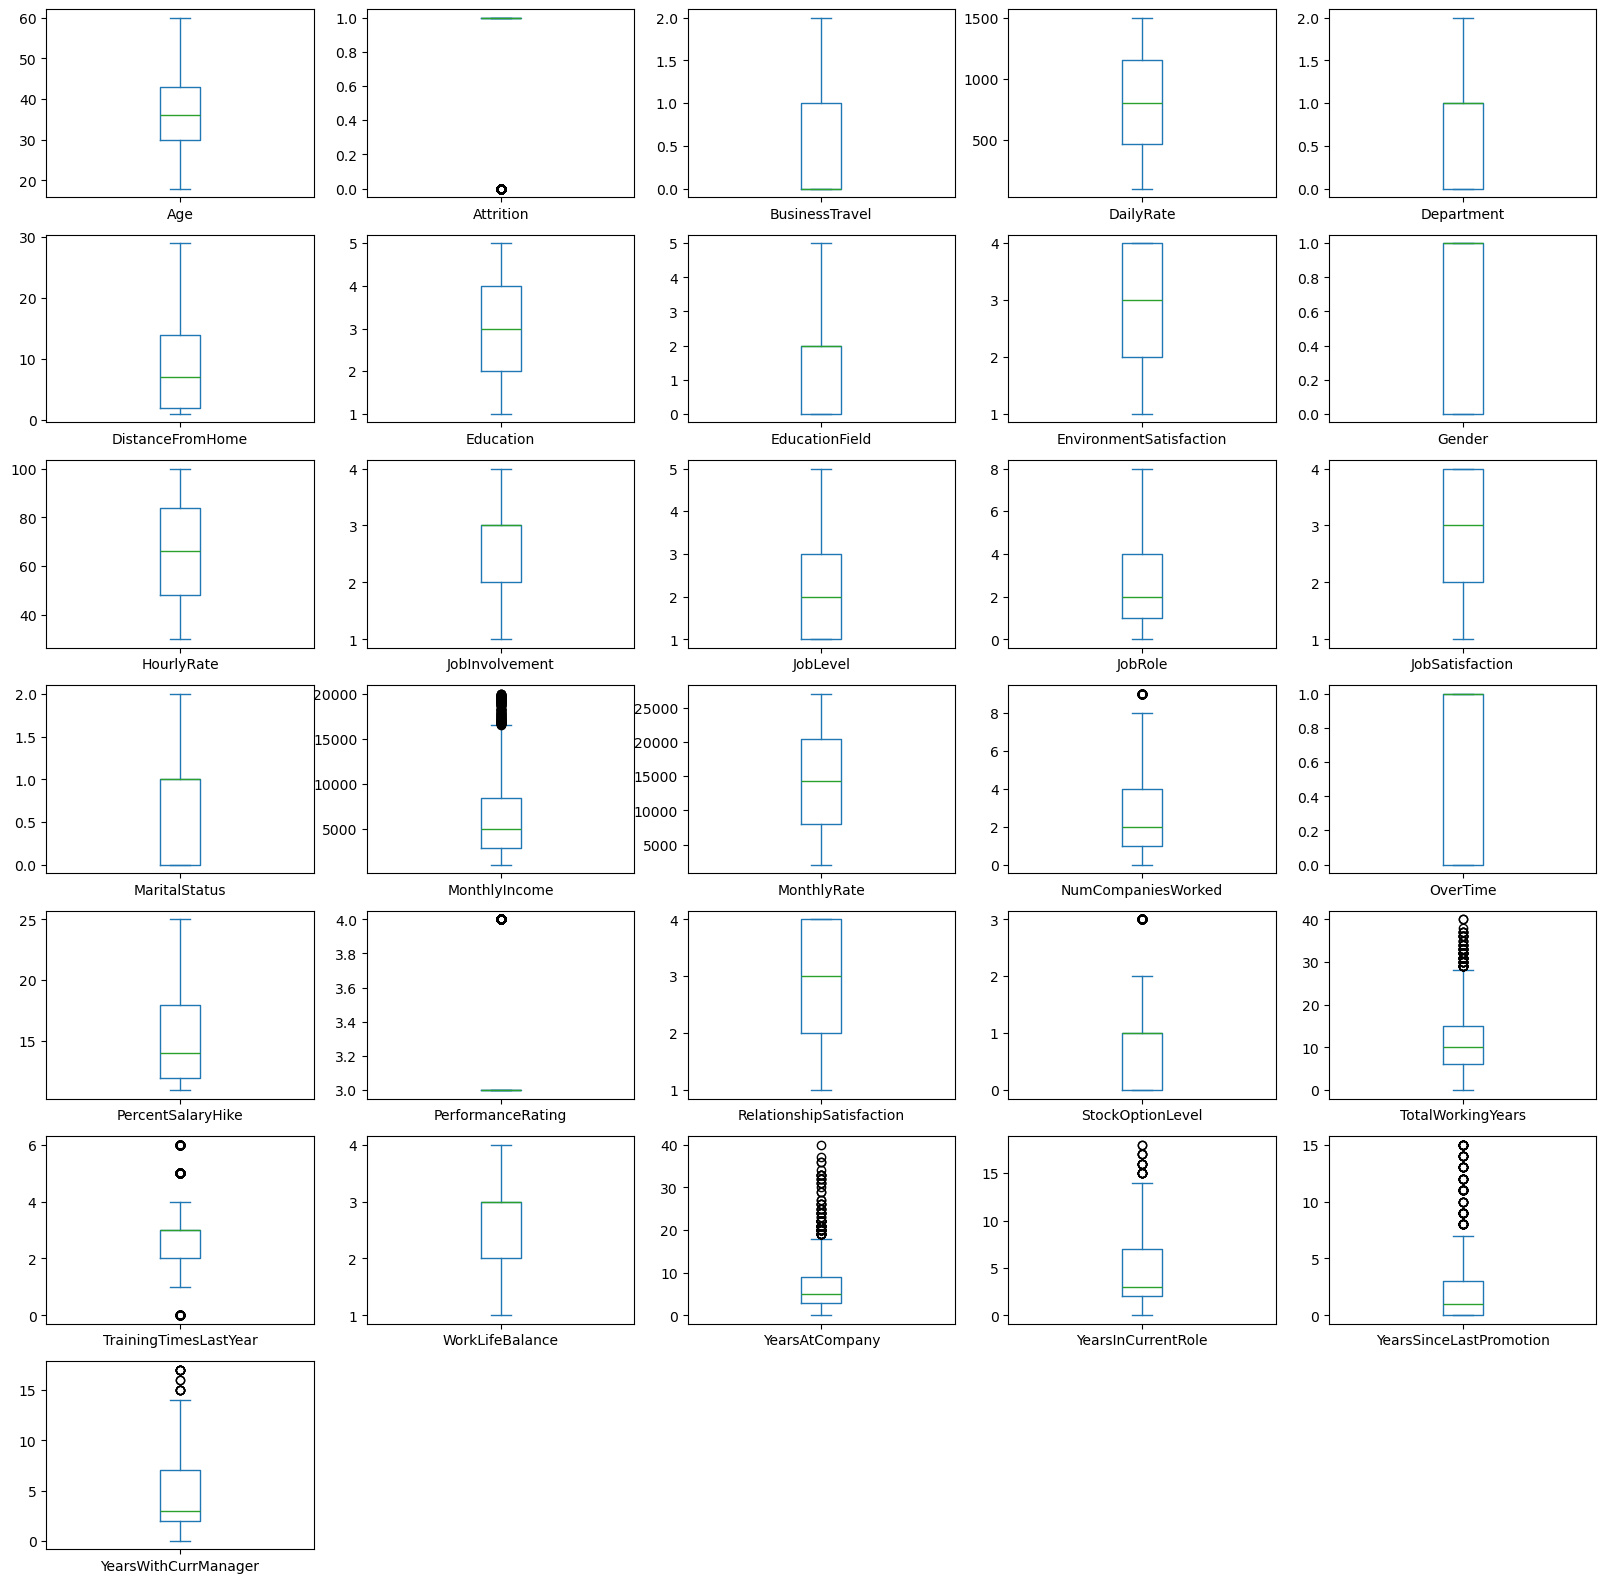

In [94]:
df.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

- A few features have outliers, but decision tree shouldn't be too affected by these

### Making a decision tree model

In [111]:
# Our dependent variable is attrition, which means our features for the model will be everything other than this
# Features: all columns except 'Attrition'
X = df.drop('Attrition', axis=1)

# Target: 'Attrition'
y = df['Attrition']


In [112]:
# Dividing our data into training and testing
size = 0.25
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=size, random_state=seed, stratify=y
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (1102, 30), Test set: (368, 30)


In [113]:
# Initializing the classifier
classifier = DecisionTreeClassifier(random_state=7)

# Training the model
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=7)

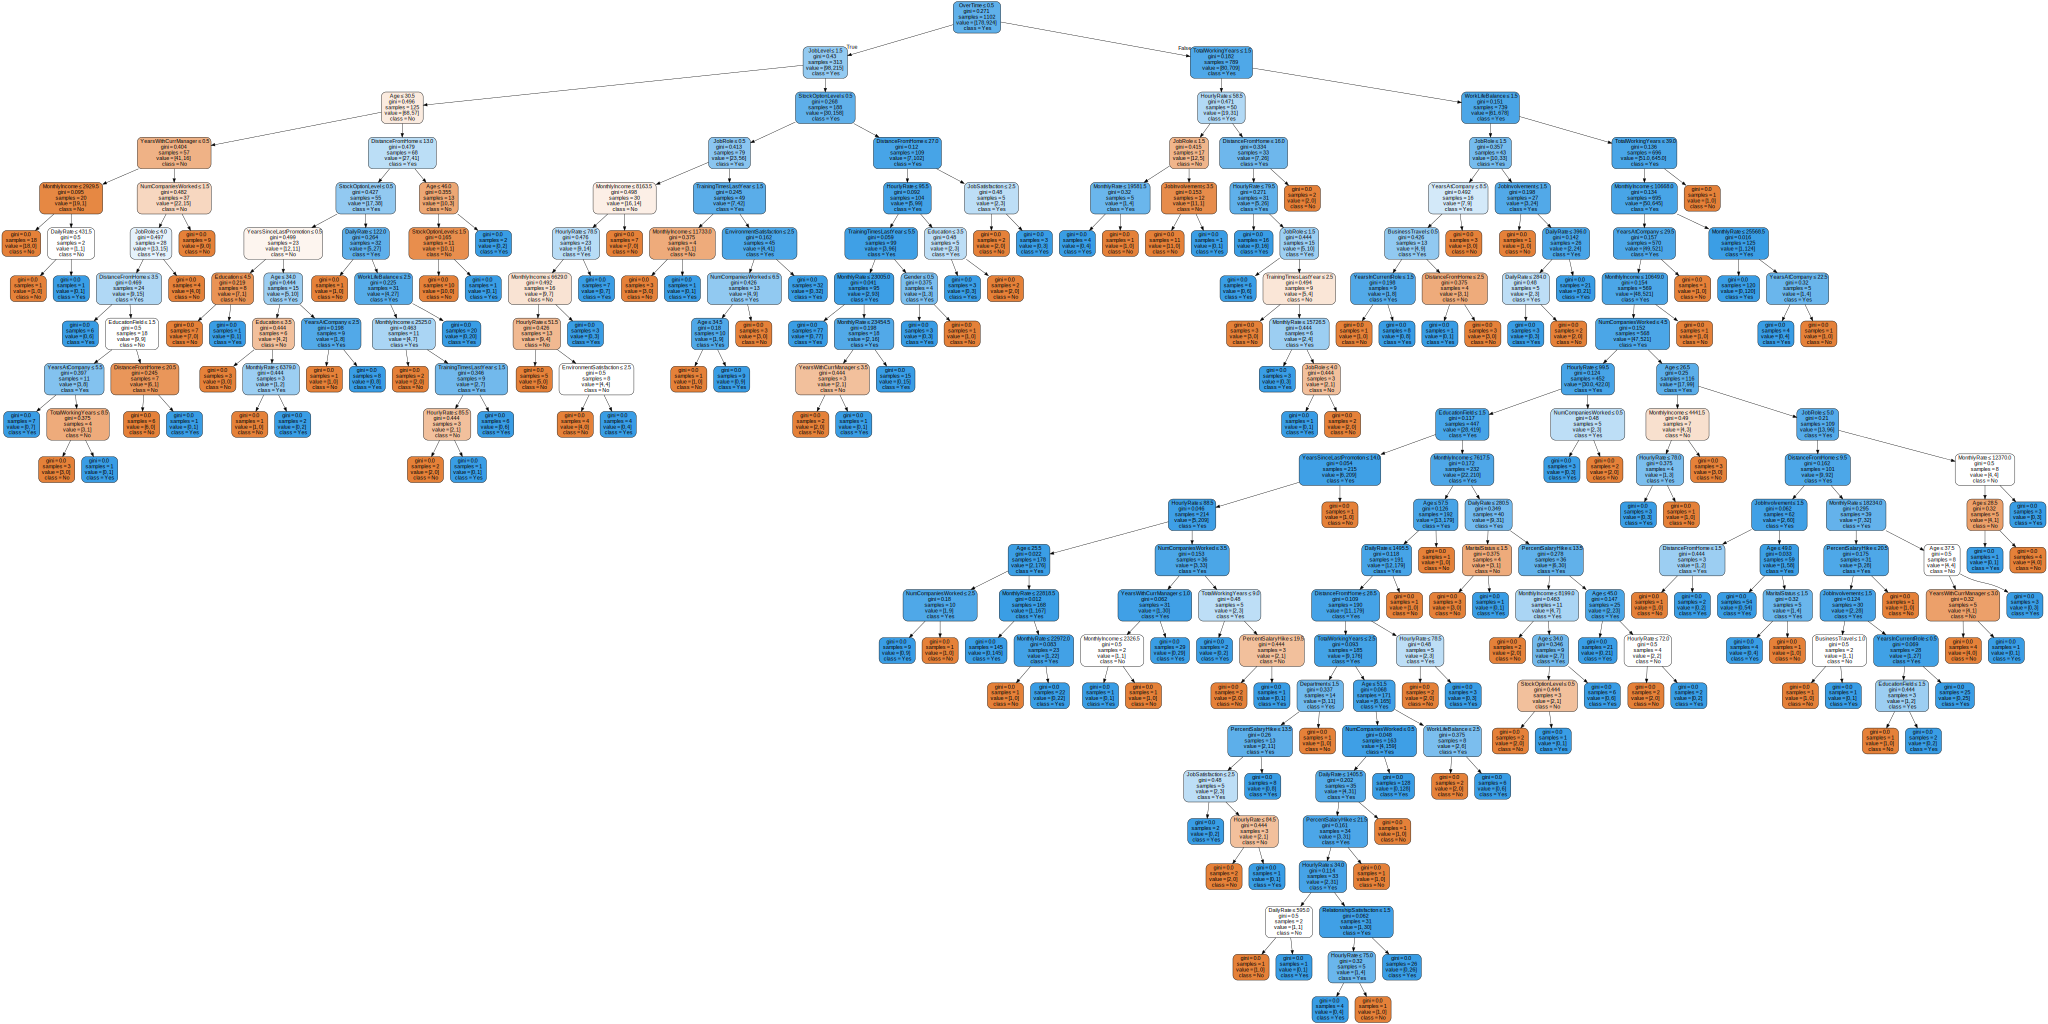

In [114]:
# Export as dot file
dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Draw graph
graph = graphviz.Source(dot_data)
graph.render("../data/decision_tree")  
graph


In [115]:
# Predicting using the test set
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7935
Confusion Matrix:
[[ 24  35]
 [ 41 268]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.41      0.39        59
           1       0.88      0.87      0.88       309

    accuracy                           0.79       368
   macro avg       0.63      0.64      0.63       368
weighted avg       0.80      0.79      0.80       368



In [116]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [117]:
# Cross validation 
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.80272109 0.76870748 0.78231293 0.74489796 0.80272109]
Mean CV accuracy: 0.7803


- With an accuracy score of 0.79 and a CV accuracy score 0.78 it definitely have a risk of error, but could possibly help provide some insight still

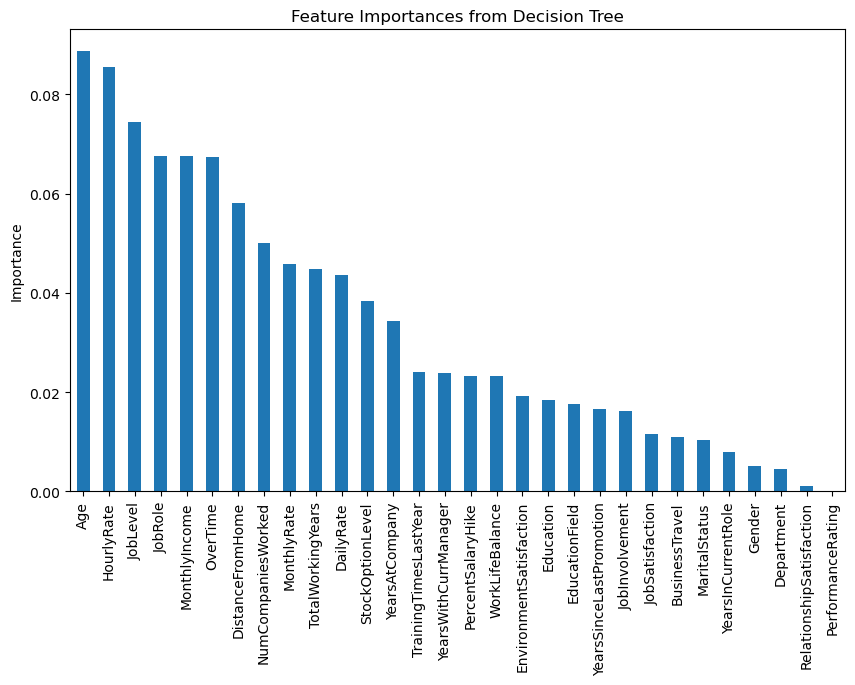

In [118]:
# Finding which feauteres are most important for employee attrition
importances = pd.Series(classifier.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances from Decision Tree')
plt.ylabel('Importance')
plt.show()

### Creating a model using random forest as well

In [107]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=7,       # You can tune this or set to None
    random_state=7
)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=7)

In [108]:
# Predict using the test set
rf_y_pred = rf_classifier.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.8533
Random Forest Confusion Matrix:
[[  7  52]
 [  2 307]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.12      0.21        59
           1       0.86      0.99      0.92       309

    accuracy                           0.85       368
   macro avg       0.82      0.56      0.56       368
weighted avg       0.84      0.85      0.80       368



In [109]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV scores: {rf_cv_scores}")
print(f"Random Forest Mean CV accuracy: {rf_cv_scores.mean():.4f}")

Random Forest CV scores: [0.85034014 0.85714286 0.86394558 0.8537415  0.85714286]
Random Forest Mean CV accuracy: 0.8565


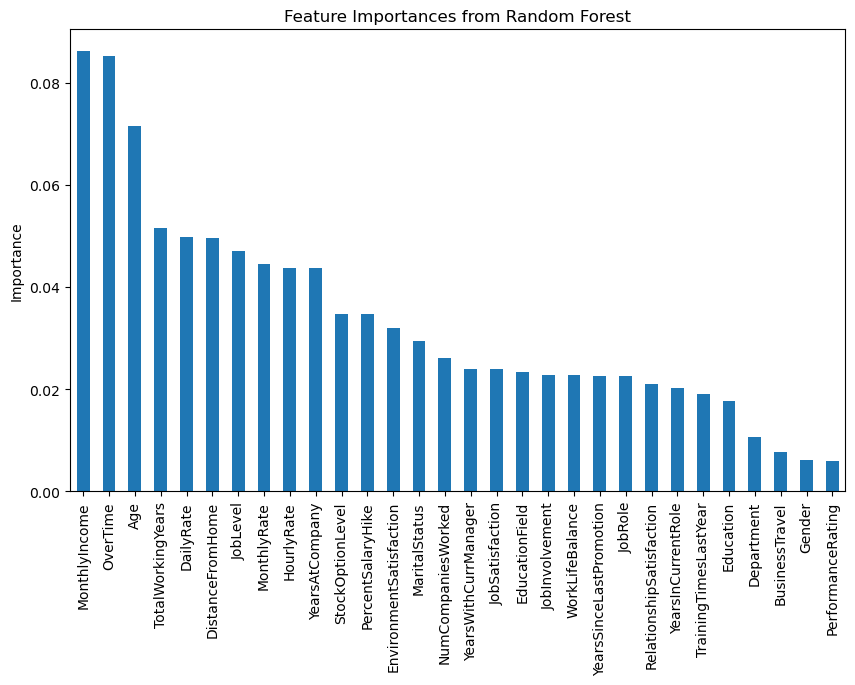

In [110]:
# Feature importances from Random Forest
rf_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
rf_importances = rf_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()

### Random Forest model have the higher accuracy of 0.85

In [119]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Test Accuracy": [acc, rf_acc],
    "CV Accuracy": [cv_scores.mean(), rf_cv_scores.mean()]
})
print(results)

           Model  Test Accuracy  CV Accuracy
0  Decision Tree       0.793478     0.780272
1  Random Forest       0.853261     0.856463


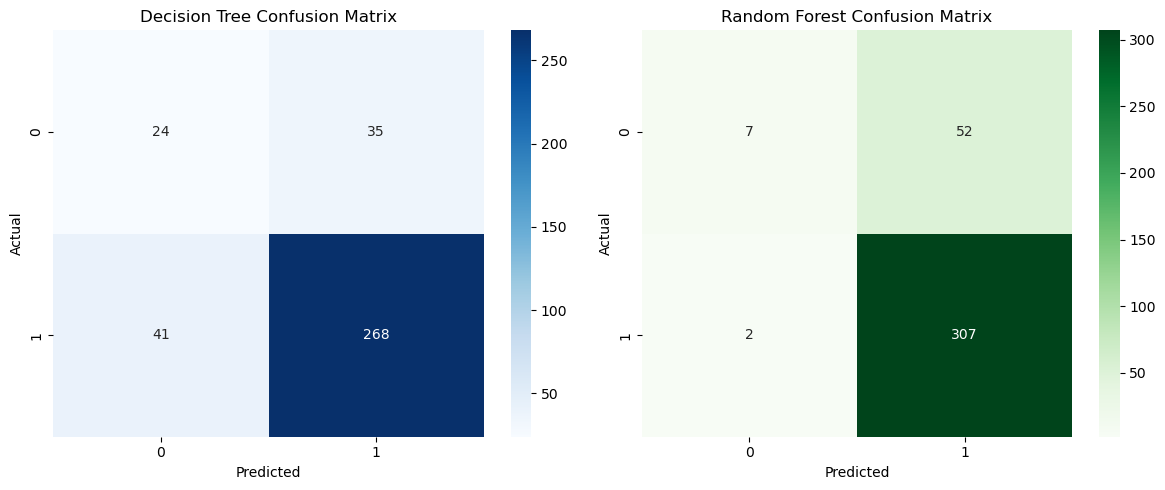

In [120]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Exporting models
import joblib

# Save Decision Tree
#joblib.dump(classifier, '../models/decision_tree_model.pkl')

# Save Random Forest
#joblib.dump(rf_classifier, '../models/random_forest_model.pkl')

['../models/random_forest_model.pkl']